# 패키지 설치

In [ ]:
!pip install fastpivot
!pip install pyarrow

!nvidia-smi
!head /proc/cpuinfo
!head -n 3 /proc/meminfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 548 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Fri Aug 12 08:10:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Def

In [ ]:
import os
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pyarrow as pa
from fastpivot import pivot_table
from tqdm import tqdm

import sys
import random

import seaborn as sns
sns.set_palette('deep')
sns.set_color_codes()
sns.set_style('white')

from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Usable Core : ", num_cores)
print("Pandas Version : ", pd.__version__) # 1.3.5
print("Pyarrow Version : ", pa.__version__) # 6.0.1


Usable Core :  4
Pandas Version :  1.3.5
Pyarrow Version :  6.0.1


In [ ]:
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install fuzzy-c-means

from fcmeans import FCM
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
!pip install modin[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 4.4 MB/s 
     |████████████████████████████████| 141 kB 57.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.2 MB/s 
     |████████████████████████████████| 54.5 MB 254 kB/s 
     |████████████████████████████████| 68 kB 7.7 MB/s 
     |████████████████████████████████| 837 kB 48.3 MB/s 
     |████████████████████████████████| 132 kB 41.6 MB/s 
     |████████████████████████████████| 1.8 MB 38.0 MB/s 
     |████████████████████████████████| 117 kB 63.9 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 9.9 MB 23.0 MB/s 
     |████████████████████████████████| 423 kB 50.6 MB/s 
     |████████████████████████████████| 4.1 MB 29.1 MB/s 
     |████████████████████████████████| 8.8 MB 31.5 MB/s 
     |████████████████████████████████| 57 kB 1.2 MB/s 
     |██████████████████████████████

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import modin.pandas as mpd
import pandas as pd
 
import time
import ray
ray.init() # 병렬처리를 위한 클러스터 구축

2022-08-12 08:11:31,068	INFO services.py:1476 -- View the Ray dashboard at http://127.0.0.1:8265


RayContext(dashboard_url='127.0.0.1:8265', python_version='3.7.13', ray_version='1.13.0', ray_commit='e4ce38d001dbbe09cd21c497fedd03d692b2be3e', address_info={'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': None, 'object_store_address': '/tmp/ray/session_2022-08-12_08-11-28_426514_83/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-08-12_08-11-28_426514_83/sockets/raylet', 'webui_url': '127.0.0.1:8265', 'session_dir': '/tmp/ray/session_2022-08-12_08-11-28_426514_83', 'metrics_export_port': 56922, 'gcs_address': '172.28.0.2:60700', 'address': '172.28.0.2:60700', 'node_id': 'f636be22c93fe00fe793f0b609eca63ff757a4d0cdef64e0db5ce6d0'})

# 데이터 불러오기

In [ ]:
# 구글 드라이브와 연동하여 데이터 위치 경로 설정
path = "/content/drive/MyDrive/AIFactory/Data/LPOINT_BIG_COMP/"

In [ ]:
DEMO = mpd.read_csv(path+"/LPOINT_BIG_COMP_01_DEMO.csv", encoding="utf-8")
PDDE = mpd.read_csv(path+"/LPOINT_BIG_COMP_02_PDDE.csv", encoding="utf-8")
COP_U = mpd.read_csv(path+"/LPOINT_BIG_COMP_03_COP_U.csv", encoding="utf-8")
PD_CLAC = mpd.read_csv(path+"/LPOINT_BIG_COMP_04_PD_CLAC.csv", encoding="utf-8")
BR = mpd.read_csv(path+"/LPOINT_BIG_COMP_05_BR.csv", encoding="utf-8")
LPAY = mpd.read_csv(path+"/LPOINT_BIG_COMP_06_LPAY.csv", encoding="utf-8")

In [ ]:
PDDE['chnl_dv'].value_counts()

1    3953242
2     428501
Name: chnl_dv, dtype: int64

In [ ]:
BR.columns = ['br_c', 'cop_c', 'br_zon_hlv', 'br_zon_mcls']

# 데이터 테이블끼리 조인.
pdde_cust = mpd.merge(PDDE, DEMO, on=['cust'])
pdde_cust = mpd.merge(pdde_cust, PD_CLAC, on=['pd_c'], how='left')
pdde_cust = mpd.merge(pdde_cust, BR, on=['br_c', 'cop_c'], how='left')

pdde_col = [
            "cust", "ma_fem_dv", "ages", "zon_hlv", # 고객 정보 (누가)
            "de_dt", "de_hr", # 시간 정보 (언제)
            "chnl_dv", "br_zon_hlv", "br_zon_mcls", "cop_c", "br_c", # 점포 정보 (어디서)
            "clac_hlv_nm", "clac_mcls_nm", "pd_nm", "pd_c", # 상품 정보 (무엇을)
            "buy_ct", "buy_am",  # 구매 정보 (어떻게)
            "rct_no"
            ]
            
pdde_cust = pdde_cust.loc[:, pdde_col]


copu_cust = mpd.merge(COP_U, DEMO, on=['cust'])
copu_cust = mpd.merge(copu_cust, BR, on=['br_c', 'cop_c'], how='left')

copu_col = [
            "cust", "ma_fem_dv", "ages", "zon_hlv", # 고객 정보 (누가)
            "de_dt", "de_hr", # 시간 정보 (언제)
            "chnl_dv", "br_zon_hlv", "br_zon_mcls", "cop_c", "br_c", # 점포 정보 (어디서)
            "vst_dt",  # 상품 정보 (무엇을) : 방문일자는 상품 정보에 해당. copu의 경우 점포 정보 또한 상품 정보에 해당
            "buy_am",  # 구매 정보 (어떻게)
            ] # 영수증 번호는 제외

copu_cust = copu_cust.loc[:, copu_col]


lpay_cust = mpd.merge(LPAY, DEMO, on=['cust'])

lpay_col = [
            "cust", "ma_fem_dv", "ages", "zon_hlv", # 고객 정보 (누가)
            "de_dt", "de_hr", # 시간 정보 (언제)
            "chnl_dv", "cop_c", # LPAY 제휴 이용 정보 (어디서)
            # 상품 정보 (무엇을) : 존재하지 않음
            "buy_am",  # 구매 정보 (어떻게)
            ] # 영수증 번호는 제외

lpay_cust = lpay_cust.loc[:, lpay_col]


pdde_cust.to_csv(path+"/LPOINT_BIG_COMP_PDDE_CUST.csv", encoding="utf-8") # 장바구니
copu_cust.to_csv(path+"/LPOINT_BIG_COMP_COPU_CUST.csv", encoding="utf-8")
lpay_cust.to_csv(path+"/LPOINT_BIG_COMP_LPAY_CUST.csv", encoding="utf-8")

# EDA 2

Text(0.5, 1.0, 'PDDE Count')

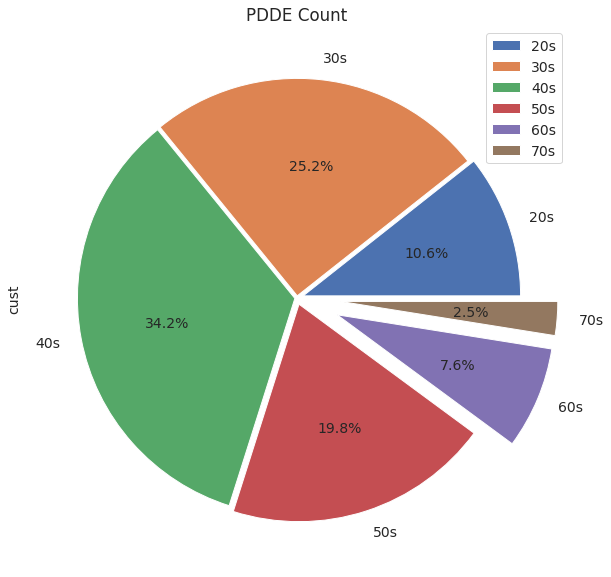

In [36]:
# pdde 사용자 파이차트
cust_counts = pdde_cust.drop_duplicates("cust").groupby("ages").cust.count()
cust_counts.index = [f"{i}0s" for i in range(2,8)]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%', explode=[.03, .01, .01, .03, .2, .2],
                 legend='ages', 
                 figsize=(10,10))
plt.title("PDDE Count")

Text(0.5, 1.0, 'Lpay Count')

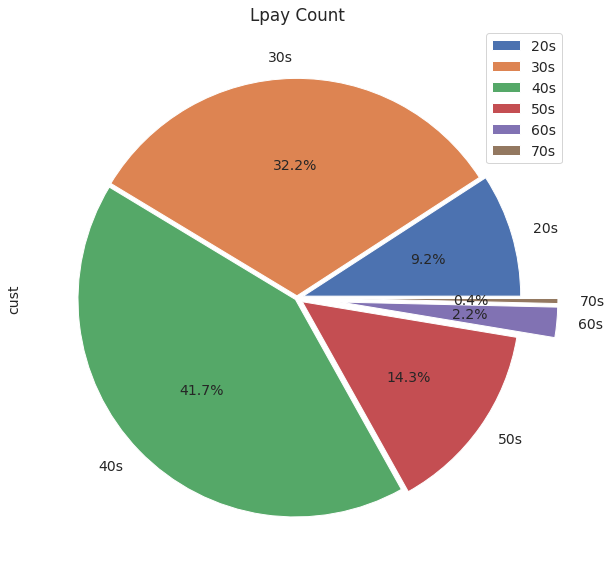

In [37]:
# lpay 사용자 파이차트
cust_counts = lpay_cust.drop_duplicates("cust").groupby("ages").cust.count()
cust_counts.index = [f"{i}0s" for i in range(2,8)]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%', explode=[.03, .01, .01, .03, .2, .2],
                 legend='ages', 
                 figsize=(10,10))
plt.title("Lpay Count")

Text(0.5, 1.0, 'PDDE Count')

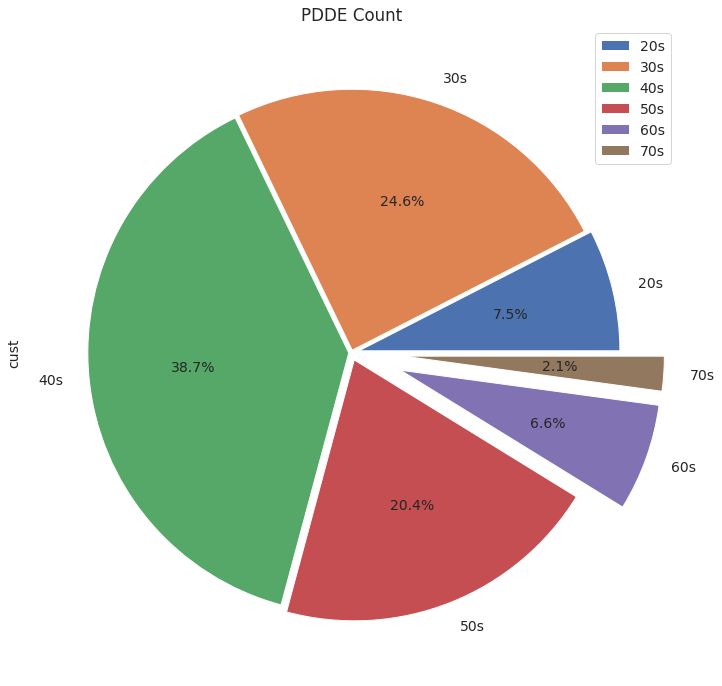

In [38]:
# pdde 사용량 파이차트
cust_counts = pdde_cust.drop_duplicates("rct_no").groupby("ages").cust.count()
cust_counts.index = [f"{i}0s" for i in range(2,8)]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%', explode=[.03, .01, .01, .03, .2, .2],
                 legend='ages', 
                 figsize=(12,12))
plt.title("PDDE Count")

Text(0.5, 1.0, 'Lpay Count')

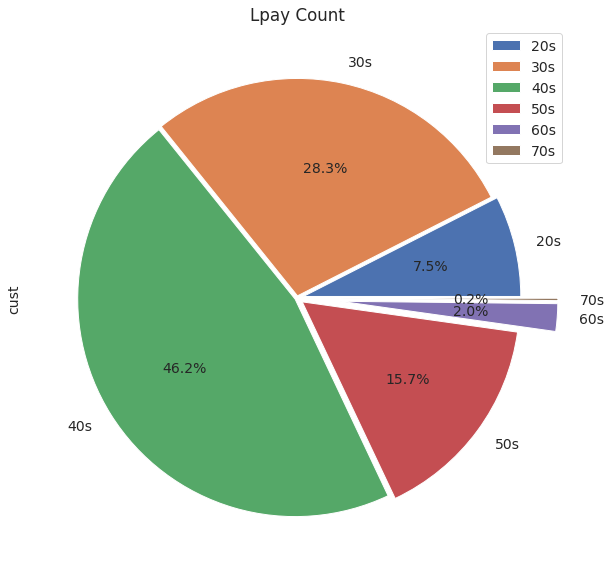

In [39]:
# LPAY 사용량 파이차트
cust_counts = lpay_cust.groupby("ages").cust.count()
cust_counts.index = [f"{i}0s" for i in range(2,8)]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%', explode=[.03, .01, .01, .03, .2, .2],
                 legend='ages', 
                 figsize=(10,10))
plt.title("Lpay Count")

Text(0.5, 1.0, 'PDDE Count')

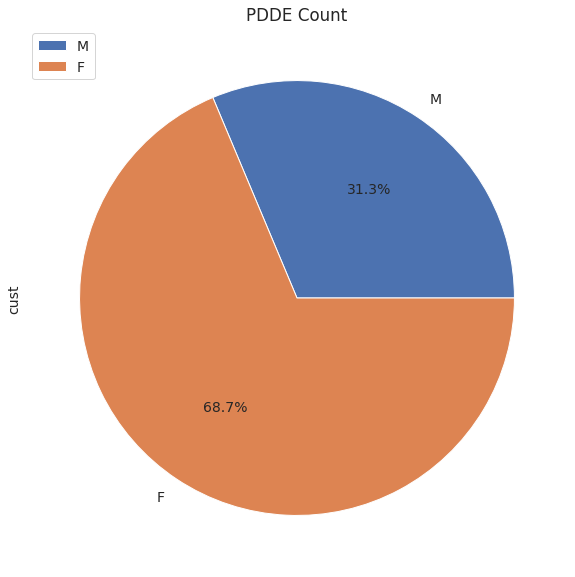

In [40]:
# pdde 남녀 사용자 파이차트
cust_counts = pdde_cust.drop_duplicates("cust").groupby("ma_fem_dv").cust.count()
cust_counts.index = ["M", "F"]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%',
                 legend='ages', 
                 figsize=(10,10))
plt.title("PDDE Count")

Text(0.5, 1.0, 'Lpay Count')

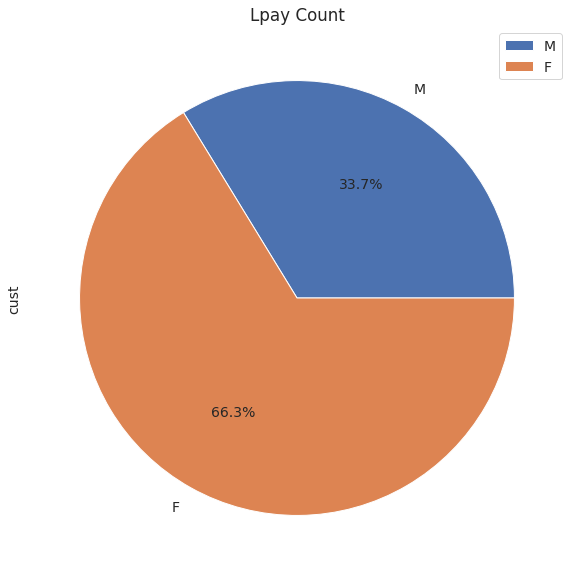

In [41]:
# lpay 남녀 사용자 파이차트
cust_counts = lpay_cust.drop_duplicates("cust").groupby("ma_fem_dv").cust.count()
cust_counts.index = ["M", "F"]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%',
                 legend='ages', 
                 figsize=(10,10))
plt.title("Lpay Count")

Text(0.5, 1.0, 'PDDE Count')

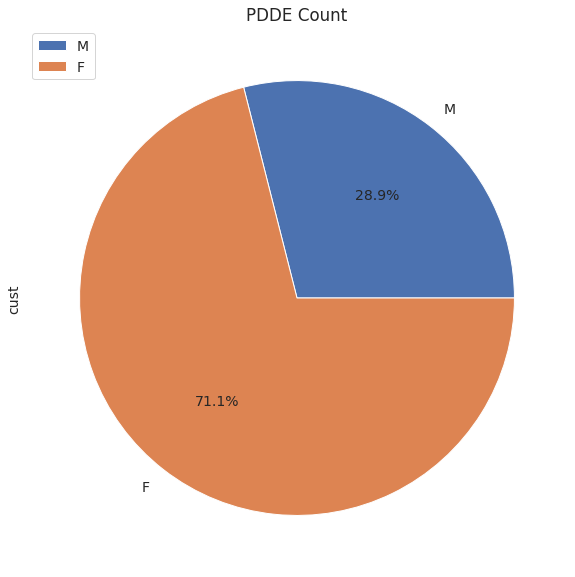

In [42]:
# pdde 남녀 사용량 파이차트
cust_counts = pdde_cust.drop_duplicates("rct_no").groupby("ma_fem_dv").cust.count()
cust_counts.index = ["M", "F"]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%',
                 legend='ages', 
                 figsize=(10,10))
plt.title("PDDE Count")

Text(0.5, 1.0, 'Lpay Count')

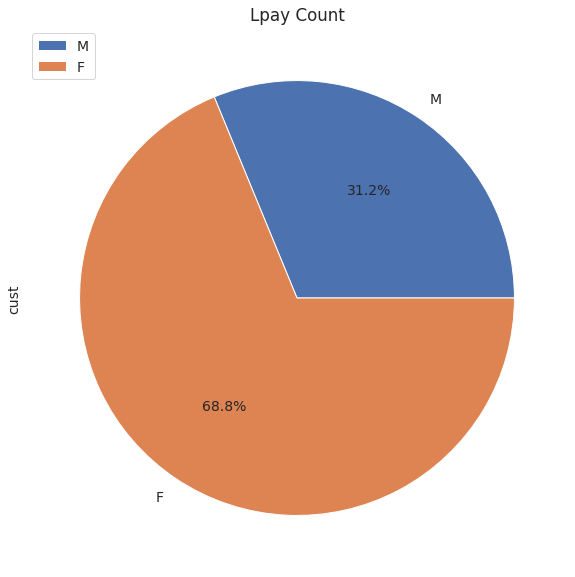

In [43]:
# lpay 남녀 사용량 파이차트
cust_counts = lpay_cust.groupby("ma_fem_dv").cust.count()
cust_counts.index = ["M", "F"]
plt.rc('font', size=14)
cust_counts.plot(kind='pie', y='ages',
                 autopct='%.1f%%',
                 legend='ages', 
                 figsize=(10,10))
plt.title("Lpay Count")

# EDA

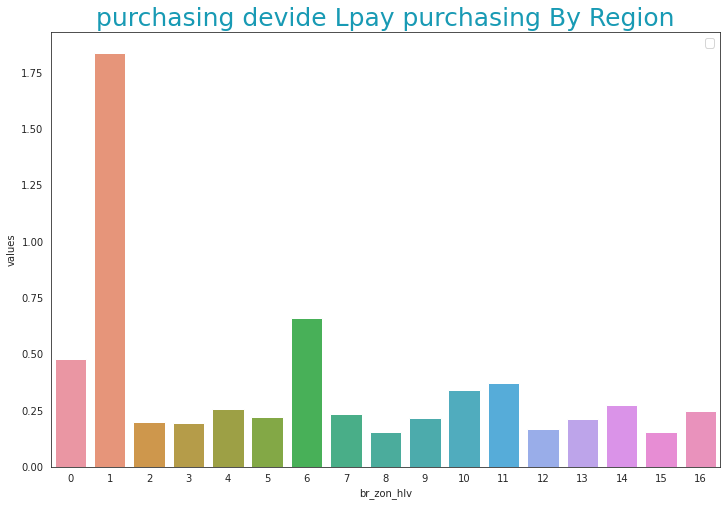

In [ ]:
# 지역별 Lpay 사용 비율
tem = pd.DataFrame({'values' : pdde_cust.groupby(['br_zon_hlv']).buy_am.sum()})
tem2 = pd.DataFrame({'values' : lpay_cust.groupby(['zon_hlv']).buy_am.sum()})
tem['values'] = tem2['values'] / tem['values']
tem['br_zon_hlv'] = np.array([i for i in range(17)])

plt.figure(figsize=[12,8])
sns.barplot(x='br_zon_hlv', y='values', data=tem)
plt.title('purchasing devide Lpay purchasing By Region', fontsize=25, color='#189AB4')
plt.legend(fontsize=12)
plt.show()

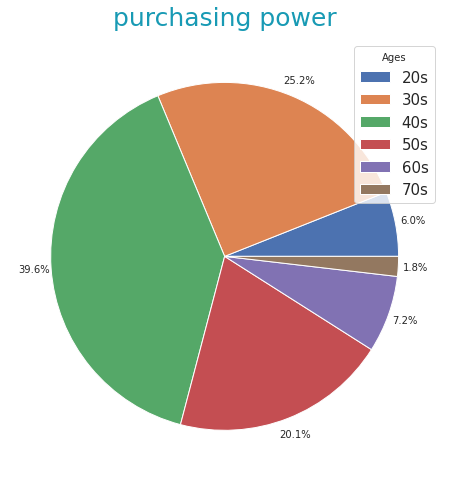

In [ ]:
# 연령대별 구매 총 금액
plt.figure(figsize=[12,8])
plt.text(s="purchasing power",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)
plt.pie(pdde_cust['buy_am'].groupby(pdde_cust['ages']).sum(), autopct='%1.1f%%', pctdistance=1.1)
plt.legend(['20s', '30s', '40s', '50s', '60s', '70s'], loc = "upper right",title="Ages", prop={'size': 15})
plt.show()

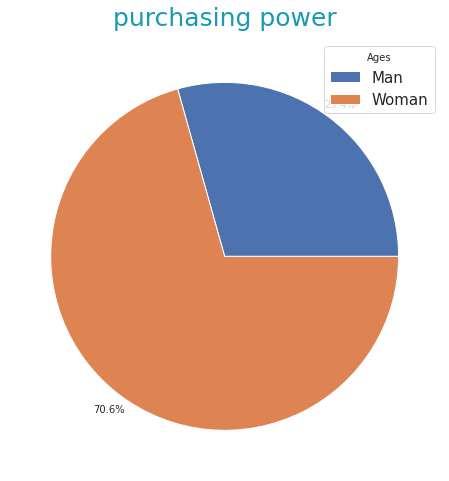

In [ ]:
# 성별에 따른 구매 총 금액
plt.figure(figsize=[12,8])
plt.text(s="purchasing power",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)
plt.pie(pdde_cust['buy_am'].groupby(pdde_cust['ma_fem_dv']).sum(), autopct='%1.1f%%', pctdistance=1.1)
plt.legend(['Man', 'Woman'], loc = "upper right",title="Ages", prop={'size': 15})
plt.show()

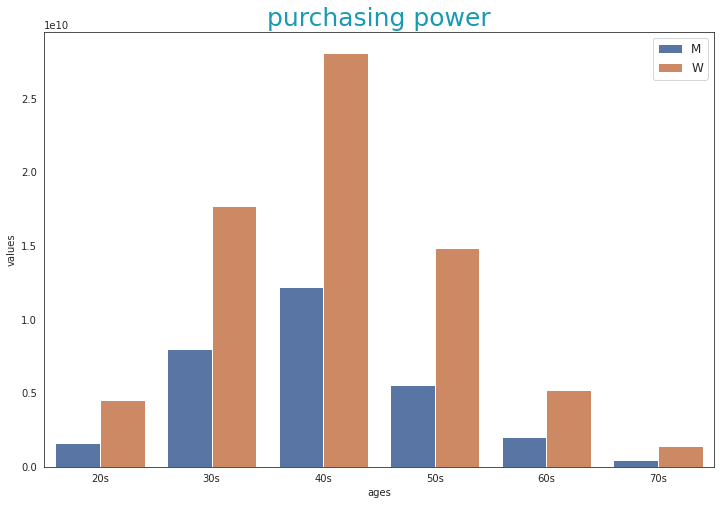

In [ ]:
# 성별/연령대 별 구매 총 금액
tem = pd.DataFrame({'values' : pdde_cust.groupby(['ma_fem_dv', 'ages']).buy_am.sum()})
tem['ma_fem_dv'] = np.array(['M'] * 6 + ['W'] * 6)
tem['ages'] = np.array(['20s', '30s', '40s', '50s', '60s', '70s'] * 2)

plt.figure(figsize=[12,8])
sns.barplot(x='ages', y='values', hue='ma_fem_dv', data=tem)
plt.title('purchasing power', fontsize=25, color='#189AB4')
plt.legend(fontsize=12)
plt.show()

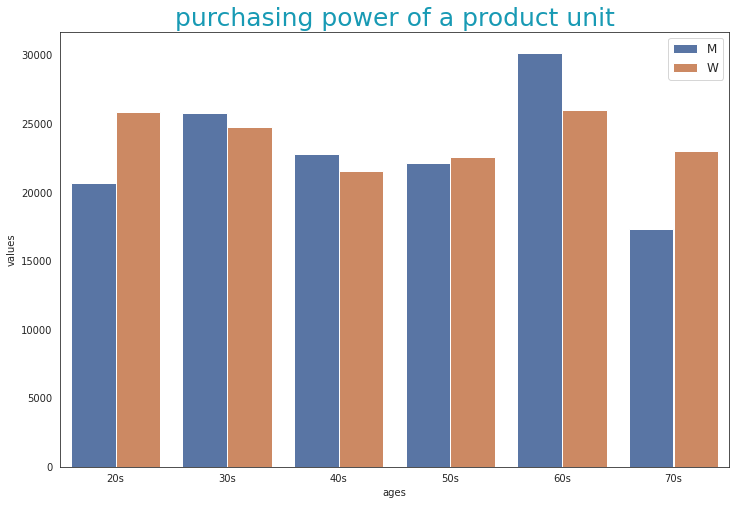

In [ ]:
# 성별/연령대 별 상품 당 금액 소비량
tem = pd.DataFrame({'values' : pdde_cust.groupby(['ma_fem_dv', 'ages']).buy_am.mean()})
tem['ma_fem_dv'] = np.array(['M'] * 6 + ['W'] * 6)
tem['ages'] = np.array(['20s', '30s', '40s', '50s', '60s', '70s'] * 2)

plt.figure(figsize=[12,8])
sns.barplot(x='ages', y='values', hue='ma_fem_dv', data=tem) 
plt.title('purchasing power of a product unit', fontsize=25, color='#189AB4')
plt.legend(fontsize=12)
plt.show()

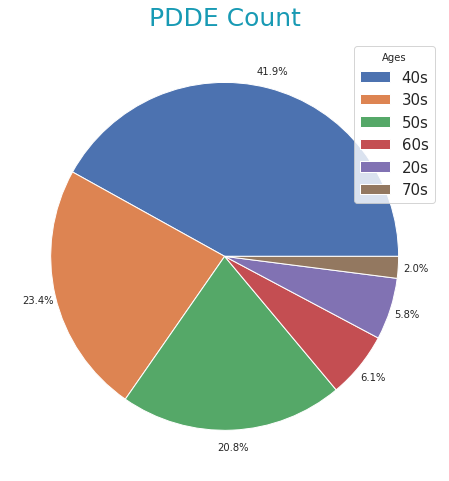

In [ ]:
# 연령대별 상품 구매 개수
plt.figure(figsize=[12,8])
plt.text(s="PDDE Count",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)
plt.pie(pdde_cust['ages'].value_counts(), autopct='%1.1f%%', pctdistance=1.1)
plt.legend(['40s', '30s', '50s', '60s', '20s', '70s'], loc = "upper right",title="Ages", prop={'size': 15})
plt.show()

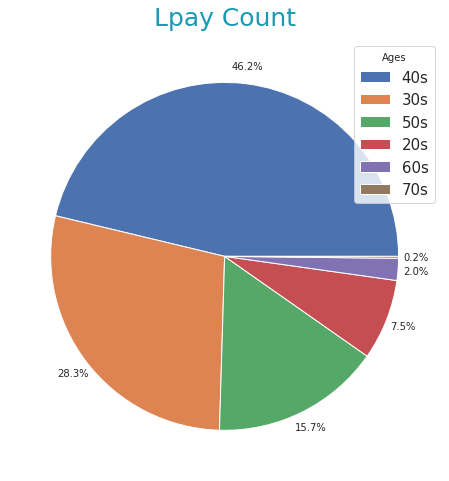

In [ ]:
# 연령대별 Lpay 상품 구매 개수
plt.figure(figsize=[12,8])
plt.text(s="Lpay Count",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)
plt.pie(lpay_cust['ages'].value_counts(), autopct='%1.1f%%', pctdistance=1.1)
plt.legend(['40s', '30s', '50s', '20s', '60s', '70s'], loc = "upper right",title="Ages", prop={'size': 15})
plt.show()

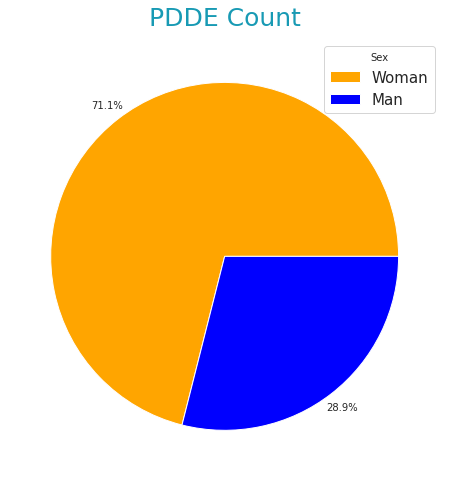

In [ ]:
# 성별에 따른 상품 구매 개수
plt.figure(figsize=[12,8])
plt.text(s="PDDE Count",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)
plt.pie(pdde_cust['ma_fem_dv'].value_counts(),autopct='%1.1f%%', pctdistance=1.1, colors = ['orange', 'blue'])
plt.legend(['Woman', 'Man'], loc = "upper right",title="Sex", prop={'size': 15})
plt.show()

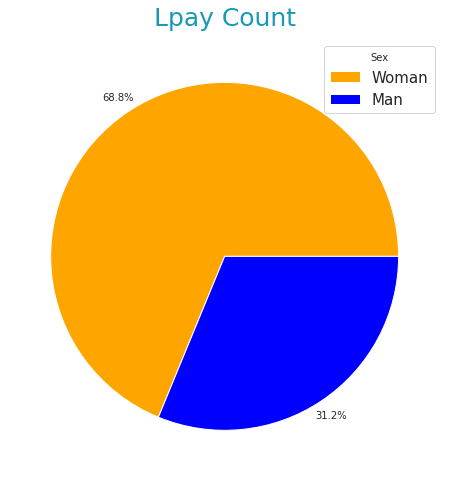

In [ ]:
# Lpay 상품 구매 개수
plt.figure(figsize=[12,8])
plt.text(s="Lpay Count",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)
plt.pie(lpay_cust['ma_fem_dv'].value_counts(),autopct='%1.1f%%', pctdistance=1.1, colors = ['orange', 'blue'])
plt.legend(['Woman', 'Man'], loc = "upper right",title="Sex", prop={'size': 15})
plt.show()

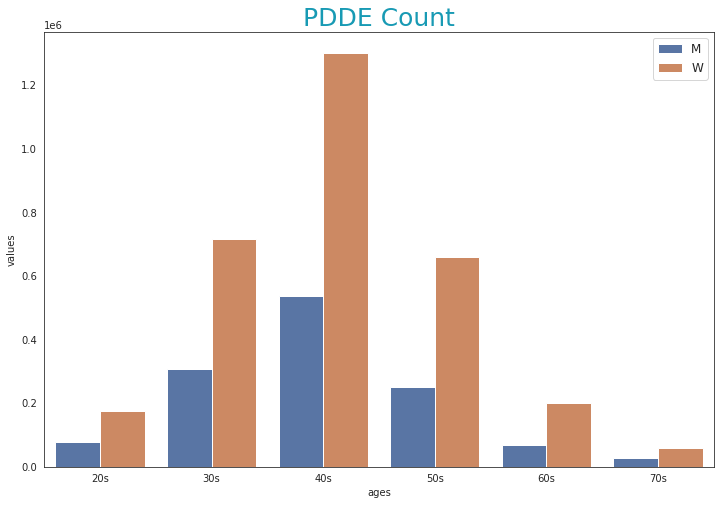

In [ ]:
# 성별/연령대별 상품 구매 개수
tem = pd.DataFrame({'values' : pdde_cust.groupby(['ma_fem_dv', 'ages']).buy_am.count()})
tem['ma_fem_dv'] = np.array(['M'] * 6 + ['W'] * 6)
tem['ages'] = np.array(['20s', '30s', '40s', '50s', '60s', '70s'] * 2)

plt.figure(figsize=[12,8])
sns.barplot(x='ages', y='values', hue='ma_fem_dv', data=tem) 
plt.title('PDDE Count', fontsize=25, color='#189AB4')
plt.legend(fontsize=12)
plt.show()

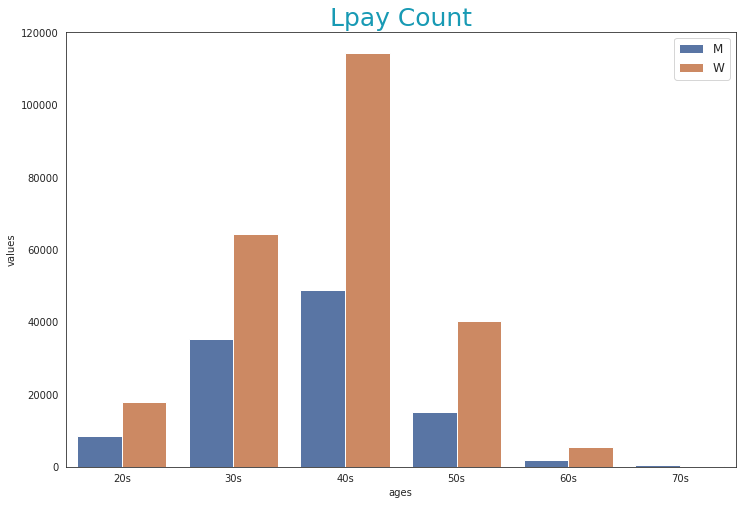

In [ ]:
# 성별/연령대별 Lpay 상품 구매 개수

tem = pd.DataFrame({'values' : lpay_cust.groupby(['ma_fem_dv', 'ages']).buy_am.count()})
tem['ma_fem_dv'] = np.array(['M'] * 6 + ['W'] * 6)
tem['ages'] = np.array(['20s', '30s', '40s', '50s', '60s', '70s'] * 2)

plt.figure(figsize=[12,8])
sns.barplot(x='ages', y='values', hue='ma_fem_dv', data=tem) 
plt.title('Lpay Count', fontsize=25, color='#189AB4')
plt.legend(fontsize=12)
plt.show()

# 데이터 전처리

In [ ]:
# 날짜 자료형 변환 함수
def make_datetime(df, drop=True):
    df["datetime"] = df["de_dt"].apply(str).str[:4] \
                                    + "-" + df["de_dt"].apply(str).str[4:6] \
                                    + "-" + df["de_dt"].apply(str).str[6:8] \
                                    + " " + df["de_hr"].apply(lambda x: str(x).zfill(2))
    df["datetime"] = pd.to_datetime(df["datetime"])
    if drop : df = df.drop(["de_dt", "de_hr"], axis=1)
    return df


# 맵핑 함수
def class_mapping(df, col, verbose=True):
    class_map = {lbl:idx for idx, lbl in enumerate(sorted(df[col].unique()))}
    if verbose : print(class_map)
    return df[col].map(class_map)

In [ ]:
# 램을 효율적으로 쓰기 위해 데이터 전처리 작업을 분할해서 진행
# 영수증번호, 고객코드, 시간 데이터 / 영수증번호 중복 제거
format_df = pd.read_parquet(path+"/LPOINT_BIG_COMP_PDDE_CUST.parquet", 
                            columns=["cust", "rct_no", "de_dt", "de_hr"], engine="pyarrow").drop_duplicates("rct_no", keep="first")
format_df = make_datetime(format_df, drop=True)
format_df = format_df.set_index("rct_no")
#print(format_df.head(5))


# 영수증번호, 성별, 나이, 채널, 거주지, 제휴사 / 영수증번호 중복제거
pdde_cust_df = pd.read_parquet(path+"/LPOINT_BIG_COMP_PDDE_CUST.parquet", 
                               columns=["rct_no", "ma_fem_dv", "ages", "chnl_dv", "zon_hlv", "cop_c"], 
                               engine="pyarrow").drop_duplicates("rct_no", keep="first").set_index("rct_no")
pdde_cust_df["ma_fem_dv"] = class_mapping(pdde_cust_df, "ma_fem_dv")
pdde_cust_df["chnl_dv"] = class_mapping(pdde_cust_df, "chnl_dv")
pdde_cust_df["ages"] = class_mapping(pdde_cust_df, "ages")
#print(pdde_cust_df.head(5))


# 두 테이블을 조인
format_df = format_df.join(pdde_cust_df)
format_df["month"] = format_df.datetime.dt.month
format_df["dayofweek"] = format_df.datetime.dt.dayofweek
# 나이, 거주지, 제휴사, 달, 요일 원핫인코딩 진행
format_df = pd.get_dummies(format_df,
                           columns=["ages", "zon_hlv", "cop_c", "month", "dayofweek"])

#format_df.head(5)

{'남성': 0, '여성': 1}
{1: 0, 2: 1}
{'20대': 0, '30대': 1, '40대': 2, '50대': 3, '60대': 4, '70대': 5}


In [ ]:
# 영수증 번호, 제품, 구매량 테이블
clac_mcls_df = pd.read_parquet(path+"/LPOINT_BIG_COMP_PDDE_CUST.parquet", columns=["rct_no", "clac_mcls_nm", "buy_ct"],engine="pyarrow")
# 피벗테이블로 만듬
clac_mcls_df = pivot_table(clac_mcls_df, index="rct_no", columns="clac_mcls_nm", values="buy_ct", aggfunc='sum', fill_value=0).astype("uint16")
clac_mcls_df.head(5)

clac_mcls_nm,DVD/홈시어터,TV,가공유,가방세트,간식/안주형과자,간편조리,갑각류,거실가구,건강가전,건강관리용품,...,핸드/풋케어,햄/소시지,향수,향신료,헤어액세서리,헤어케어,호주산소고기,홈웨어,홍삼/인삼가공식품,화장지/티슈
rct_no,,,,,,,,,,,,,,,,,,,,,
A01000001113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01000002265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01000003148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01000004946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01000005297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 저장
processed_df = format_df.reset_index().set_index("rct_no").join(clac_mcls_df)
processed_df.to_parquet(path + "LPOINT_BIG_COMP_CLAC_MCLS_SUM.parquet", index=True, engine="pyarrow", compression=None)

In [ ]:
# 로드
processed_df = pd.read_parquet(path + "LPOINT_BIG_COMP_CLAC_MCLS_SUM.parquet", engine="pyarrow")
processed_df = processed_df.reset_index().set_index("cust")
processed_df.head(3)

,rct_no,datetime,ma_fem_dv,chnl_dv,ages_0,ages_1,ages_2,ages_3,ages_4,ages_5,...,핸드/풋케어,햄/소시지,향수,향신료,헤어액세서리,헤어케어,호주산소고기,홈웨어,홍삼/인삼가공식품,화장지/티슈
cust,,,,,,,,,,,,,,,,,,,,,
M430112881,A01000001113,2021-01-01 10:00:00,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
M430112881,A01000003148,2021-01-01 10:00:00,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
M430112881,A01000004946,2021-01-01 10:00:00,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import torch
import torchvision
from torchvision import transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset

from sklearn.model_selection import train_test_split


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 사용자 인덱스 모음
custs = processed_df.index.unique()

features = [col for col in format_df.columns if col not in ["rct_no", "cust", "datetime"]] + ["date_interval", "date_from"] + list(clac_mcls_df.columns)
print(*custs[:400])
print(*features)

M430112881 M646853852 M669384418 M886923095 M707991383 M117855953 M641274652 M625839441 M284446967 M401266932 M860973355 M686795542 M878181490 M704866277 M942878878 M174599398 M651841347 M577884977 M511106441 M531271959 M422047369 M234266219 M049345995 M497989990 M009032626 M931922533 M165312283 M996518031 M705629628 M184969427 M741760270 M243577483 M558692172 M377967939 M838446773 M506355556 M879094374 M732600894 M856124318 M263574190 M157204685 M650733020 M017256273 M641186030 M986125865 M232573809 M268811651 M162681947 M163175113 M440960058 M502480776 M191537184 M030477840 M690898061 M506965359 M725878700 M840551273 M746428121 M334943764 M561787985 M982559329 M807374636 M676262214 M988646555 M530294706 M900002349 M694209751 M123475113 M318802112 M038801652 M517637921 M539562667 M615380326 M609491987 M259613010 M338310215 M156930891 M419249862 M474747127 M624588650 M083434555 M049216782 M897579293 M316171414 M583031784 M370732403 M336360825 M835554931 M456838034 M586590453 M618317251

In [ ]:
# 사람 별 영수증 묶음을 만드는 함수.
# 사람을 입력하면 영수증 묶음 값이 출력되는 함수.
# window = 영수증 묶음 개수, slide = 묶음별로 겹치는 개수
def make_rct_tensor_by_cust(cust_idx, features=features, window=10, slide=5, dtype=torch.int16, drop=True):
    global processed_df

    cust_df = processed_df.loc[cust_idx]
    rct_tensor_by_cust = []
    rct_nos =[]
    rct_length = len(cust_df)

    if rct_length < window or not isinstance(cust_df, pd.core.frame.DataFrame): # 길이가 1인 시리즈는 None 반환
        return None

    # cust index는 버려진다. rct_no도 index가 되면서 버려질 것.
    # 구입일 간격에 대한 feature들을 생성하기 위해 sorting한다.
    cust_df = cust_df.set_index("datetime").sort_values("datetime") \
                 .reset_index().set_index("rct_no")
    cust_df["date_interval"] = (cust_df.datetime - cust_df.datetime.shift(-1)).dt.days.fillna(-1) # 몇일만에 새로운 구입을 하였는지

    cust_rcts = list(range(rct_length))
    for i in cust_rcts[::slide]:
        if rct_length-window < i: # 고객의 남은 영수증이 window개 이하인 경우 break
            break
        else:
            temp = cust_df.iloc[i : i+window]
            temp["date_from"] = (temp.datetime.iloc[0] - temp.datetime).dt.days # 최근 구입일로부터 몇일만에 구입한 영수증인지.  ex) [2]: 01/22, [1]: 02/11, [0]: 02/13 
                                                                                                                                # => [2]: 22,    [1]: 20,    [0]: 0
            if not drop:
                rct_no = list(temp.index)
                rct_nos.append(rct_no)

            temp = temp[features] # 피쳐 집합으로 원하는 피쳐를 골라 저장
            temp = torch.tensor(temp.values, dtype=dtype) # window x features

            rct_tensor_by_cust.append(temp)

        
    rct_tensor_by_cust = torch.stack(rct_tensor_by_cust, dim=0) # cust's rcts x window x features
    if not drop:
        return rct_tensor_by_cust, rct_nos
    else:
        return rct_tensor_by_cust

In [ ]:
len(custs)

26917

In [ ]:
window = 10 # 한 텐서 안에 들어갈 "최근 영수증 개수"
slide = 5 # 한 고객의 영수증 기록에서 window로 스캔 시의 간격
chunk_num = 16 
sample_size = 26912 # 26912
rct_tensors = []
sampled_custs = np.random.choice(list(custs), size=sample_size)

# 램 초과 방지 위해 분할작업.
for j in tqdm(range(sample_size//chunk_num), position=0, desc="making_data...", leave=None):
    if j == sample_size//chunk_num-1:
        rct_chunk_tensors = Parallel(n_jobs=num_cores)(delayed(make_rct_tensor_by_cust)(cust_idx, features=features, window=window, slide=10, dtype=torch.int16) for cust_idx in sampled_custs[j*chunk_num:])
    else:
        rct_chunk_tensors = Parallel(n_jobs=num_cores)(delayed(make_rct_tensor_by_cust)(cust_idx, features=features, window=window, slide=10, dtype=torch.int16) for cust_idx in sampled_custs[j*chunk_num : (j+1)*chunk_num])
    rct_chunk_tensors = [t for t in rct_chunk_tensors if t is not None] # None을 없앤다.
    rct_chunk_tensors = torch.cat(rct_chunk_tensors, dim=0)

    print(f"{j}번째 chunk의 Tensor Shape : ", rct_chunk_tensors.shape)
    rct_tensors.append(rct_chunk_tensors) # 전체 tensor에 추가
    del rct_chunk_tensors

rct_tensors = torch.cat(rct_tensors, dim = 0)
rct_tensors.shape
# 최종 데이터 전처리 후 데이터 중간저장
torch.save(rct_tensors, path + "LPOINT_BIG_COMP_RCT_TENSORS26912.pt")

making_data...:   0%|          | 1/1682 [00:09<4:38:52,  9.95s/it]

0번째 chunk의 Tensor Shape :  torch.Size([55, 10, 401])


making_data...:   0%|          | 2/1682 [00:18<4:07:57,  8.86s/it]

1번째 chunk의 Tensor Shape :  torch.Size([85, 10, 401])


making_data...:   0%|          | 3/1682 [00:27<4:11:40,  8.99s/it]

2번째 chunk의 Tensor Shape :  torch.Size([36, 10, 401])


making_data...:   0%|          | 4/1682 [00:37<4:26:53,  9.54s/it]

3번째 chunk의 Tensor Shape :  torch.Size([65, 10, 401])


making_data...:   0%|          | 5/1682 [00:48<4:40:20, 10.03s/it]

4번째 chunk의 Tensor Shape :  torch.Size([78, 10, 401])


making_data...:   0%|          | 6/1682 [00:57<4:34:15,  9.82s/it]

5번째 chunk의 Tensor Shape :  torch.Size([61, 10, 401])


making_data...:   0%|          | 7/1682 [01:07<4:30:03,  9.67s/it]

6번째 chunk의 Tensor Shape :  torch.Size([55, 10, 401])


making_data...:   0%|          | 8/1682 [01:15<4:15:32,  9.16s/it]

7번째 chunk의 Tensor Shape :  torch.Size([78, 10, 401])


making_data...:   1%|          | 9/1682 [01:23<4:06:56,  8.86s/it]

8번째 chunk의 Tensor Shape :  torch.Size([74, 10, 401])


making_data...:   1%|          | 10/1682 [01:32<4:05:31,  8.81s/it]

9번째 chunk의 Tensor Shape :  torch.Size([68, 10, 401])


making_data...:   1%|          | 11/1682 [01:40<3:59:20,  8.59s/it]

10번째 chunk의 Tensor Shape :  torch.Size([90, 10, 401])


making_data...:   1%|          | 12/1682 [01:48<3:55:28,  8.46s/it]

11번째 chunk의 Tensor Shape :  torch.Size([76, 10, 401])


making_data...:   1%|          | 13/1682 [01:56<3:53:54,  8.41s/it]

12번째 chunk의 Tensor Shape :  torch.Size([65, 10, 401])


making_data...:   1%|          | 14/1682 [02:04<3:51:17,  8.32s/it]

13번째 chunk의 Tensor Shape :  torch.Size([104, 10, 401])


making_data...:   1%|          | 15/1682 [02:13<3:50:04,  8.28s/it]

14번째 chunk의 Tensor Shape :  torch.Size([89, 10, 401])


making_data...:   1%|          | 16/1682 [02:21<3:47:21,  8.19s/it]

15번째 chunk의 Tensor Shape :  torch.Size([92, 10, 401])


making_data...:   1%|          | 17/1682 [02:29<3:53:09,  8.40s/it]

16번째 chunk의 Tensor Shape :  torch.Size([43, 10, 401])


making_data...:   1%|          | 18/1682 [02:38<3:50:58,  8.33s/it]

17번째 chunk의 Tensor Shape :  torch.Size([96, 10, 401])


making_data...:   1%|          | 19/1682 [02:46<3:49:23,  8.28s/it]

18번째 chunk의 Tensor Shape :  torch.Size([98, 10, 401])


making_data...:   1%|          | 20/1682 [02:54<3:47:42,  8.22s/it]

19번째 chunk의 Tensor Shape :  torch.Size([55, 10, 401])


making_data...:   1%|          | 21/1682 [03:02<3:46:37,  8.19s/it]

20번째 chunk의 Tensor Shape :  torch.Size([43, 10, 401])


making_data...:   1%|▏         | 22/1682 [03:10<3:44:58,  8.13s/it]

21번째 chunk의 Tensor Shape :  torch.Size([51, 10, 401])


making_data...:   1%|▏         | 23/1682 [03:18<3:45:21,  8.15s/it]

22번째 chunk의 Tensor Shape :  torch.Size([69, 10, 401])


making_data...:   1%|▏         | 24/1682 [03:26<3:45:07,  8.15s/it]

23번째 chunk의 Tensor Shape :  torch.Size([53, 10, 401])


making_data...:   1%|▏         | 25/1682 [03:35<3:53:06,  8.44s/it]

24번째 chunk의 Tensor Shape :  torch.Size([68, 10, 401])


making_data...:   2%|▏         | 26/1682 [03:45<4:03:40,  8.83s/it]

25번째 chunk의 Tensor Shape :  torch.Size([95, 10, 401])


making_data...:   2%|▏         | 27/1682 [03:53<3:58:33,  8.65s/it]

26번째 chunk의 Tensor Shape :  torch.Size([79, 10, 401])


making_data...:   2%|▏         | 28/1682 [04:02<3:56:17,  8.57s/it]

27번째 chunk의 Tensor Shape :  torch.Size([66, 10, 401])


making_data...:   2%|▏         | 29/1682 [04:10<3:51:55,  8.42s/it]

28번째 chunk의 Tensor Shape :  torch.Size([52, 10, 401])


making_data...:   2%|▏         | 30/1682 [04:18<3:50:05,  8.36s/it]

29번째 chunk의 Tensor Shape :  torch.Size([115, 10, 401])


making_data...:   2%|▏         | 31/1682 [04:27<3:54:15,  8.51s/it]

30번째 chunk의 Tensor Shape :  torch.Size([56, 10, 401])


making_data...:   2%|▏         | 32/1682 [04:36<3:57:37,  8.64s/it]

31번째 chunk의 Tensor Shape :  torch.Size([72, 10, 401])


making_data...:   2%|▏         | 33/1682 [04:44<3:53:07,  8.48s/it]

32번째 chunk의 Tensor Shape :  torch.Size([50, 10, 401])


making_data...:   2%|▏         | 34/1682 [04:52<3:50:54,  8.41s/it]

33번째 chunk의 Tensor Shape :  torch.Size([113, 10, 401])


making_data...:   2%|▏         | 35/1682 [05:00<3:47:15,  8.28s/it]

34번째 chunk의 Tensor Shape :  torch.Size([71, 10, 401])


# 오토인토더 모델링

In [ ]:
# 저장한 전처리 데이터 불러오기
# 데이터 파일이 존재한다면 불러와서 모델링 부터 진행 가능
rct_tensors = torch.load(path + "LPOINT_BIG_COMP_RCT_TENSORS26912.pt")
rct_tensors.shape

torch.Size([112953, 10, 401])

In [ ]:
# 50 이상 열에 대해 로그 스케일과 min-max 스케일 적용
tem = rct_tensors[:,:, 50:]
tem = torch.log1p(tem)

for i in range(351):
    maxs = tem[:,:,i].max()
    if maxs == 0:
        continue
    tem[:,:,i] = tem[:,:,i] / maxs

rct_tensors = torch.cat((rct_tensors[:,:,:50], tem), dim = 2)


# -1 값인경우 로그 스케일 진행시 -Inf로 값이 바뀜. 후처리해줌. 
idx_1, idx_2, idx_3 = np.where(rct_tensors.detach().numpy() == -np.Inf)
print(np.unique(idx_2))
print(np.unique(idx_3))
rct_tensors[idx_1,9,50] = -1

[9]
[50]


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, rct_tensors = None, cust_idx = None, train_mode=True, transforms = None):
        self.transforms = transforms
        self.rct_tensors = rct_tensors
        self.train_mode = train_mode
        if not self.train_mode:
            if (make_rct_tensor_by_cust(cust_idx, drop=False) is None):
                self.tensors = []
            else:
                # 테스트 모드에서 데이터를 새로 불러옴.
                self.tensors, self.rct_nos = make_rct_tensor_by_cust(cust_idx, drop=False)

    def __len__(self):
        if self.train_mode :
            return self.rct_tensors.shape[0]
        else: 
            return len(self.tensors)

    def __getitem__(self, idx):
        
        if self.train_mode:
            input = self.rct_tensors[idx]
            if self.transforms is not None:
                input = self.transforms(input)[0]
            return input, input[:,52:]
        else:
            return self.tensors[idx], self.rct_nos[idx][0]

In [ ]:
class TimeDistributed(nn.Module):
    def __init__(self, module, batch_first=False):
        super(TimeDistributed, self).__init__()
        self.module = module
        self.batch_first = batch_first

    def forward(self, x):
        if len(x.size()) <= 2:
            return self.module(x)
        # Squash samples and timesteps into a single axis
        x_reshape = x.contiguous().view(-1, x.size(-1))  # (samples * timesteps, input_size)
        y = self.module(x_reshape)
        # We have to reshape Y
        if self.batch_first:
            y = y.contiguous().view(x.size(0), -1, y.size(-1))  # (samples, timesteps, output_size)
        else:
            y = y.view(-1, x.size(1), y.size(-1))  # (timesteps, samples, output_size)
        return y

In [ ]:
class Encoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(Encoder, self).__init__()
        self.seq_len, self.n_features = seq_len, n_features
        self.embedding_dim, self.hidden_dim = (
            embedding_dim, 2 * embedding_dim
        )
        self.rnn1 = nn.LSTM(
          input_size=n_features,
          hidden_size=self.hidden_dim,
          num_layers=1,
          batch_first=True
        )
        self.rnn2 = nn.LSTM(
          input_size=self.hidden_dim,
          hidden_size=embedding_dim,
          num_layers=1,
          batch_first=True
        )
    def forward(self, x):
        x, (_, _) = self.rnn1(x)
        x, (hidden_n, _) = self.rnn2(x)
        return  x[:,-1,:]

In [ ]:
class Decoder(nn.Module):
    def __init__(self, seq_len, input_dim=64, n_features=1):
        super(Decoder, self).__init__()
        self.seq_len, self.input_dim = seq_len, input_dim
        self.hidden_dim, self.n_features = 2 * input_dim, n_features
        self.rnn1 = nn.LSTM(
          input_size=input_dim,
          hidden_size=input_dim,
          num_layers=1,
          batch_first=True
        )
        self.rnn2 = nn.LSTM(
          input_size=input_dim,
          hidden_size=self.hidden_dim,
          num_layers=1,
          batch_first=True
        )
        self.output_layer = torch.nn.Linear(self.hidden_dim, n_features)
        self.timedist = TimeDistributed(self.output_layer)
        
    def forward(self, x):
        x=x.reshape(-1,1,self.input_dim).repeat(1,self.seq_len,1)       
        x, (hidden_n, cell_n) = self.rnn1(x)
        x, (hidden_n, cell_n) = self.rnn2(x)
        return self.timedist(x)

In [ ]:
class RecurrentAutoencoder(nn.Module):
    def __init__(self, seq_len, n_features, embedding_dim=64):
        super(RecurrentAutoencoder, self).__init__()
        self.encoder = Encoder(seq_len, n_features, embedding_dim)#.to(device)
        self.decoder = Decoder(seq_len, embedding_dim, n_features-52)#.to(device)

    def forward(self, x, train_mode = True):
        if train_mode:
            x = self.encoder(x)
            x = self.decoder(x)
        else:
            x = self.encoder(x)
        return x

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = RecurrentAutoencoder(window, 401, 5)
model = model.to(device)

batch_size = 512

In [ ]:
#train_id, test_id = train_test_split(range(rct_tensors.shape[0]), test_size = 300, random_state = 42)
train_id, valid_id = train_test_split(range(rct_tensors.shape[0]), test_size = 0.2, random_state = 42)

In [ ]:
train_dataset = CustomDataset(rct_tensors[train_id], train_mode = True)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers=0)

valid_dataset = CustomDataset(rct_tensors[valid_id], train_mode = True)
valid_loader = DataLoader(valid_dataset, batch_size = batch_size, shuffle=False, num_workers=0)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)
# Loss Function
criterion = nn.L1Loss(reduction='sum').to(device)

In [ ]:
def train(model, optimizer, train_loader, vali_loader, scheduler, device):

    best_mse = 9999
    
    for epoch in range(60):
        model.train()
        train_loss = []
        for idx, batch in tqdm(enumerate(train_loader)):
            x, y = batch[0].float().to(device), batch[1].float().to(device)
            optimizer.zero_grad()
            # Data -> Model -> Output
            pred = model(x)
            
            # Calc loss
            loss = criterion(pred, y)

            # backpropagation
            loss.backward()
            optimizer.step()

            train_loss.append(loss.item()/batch_size)
                        
        # Evaluation Validation set
        vali_mse = validation(model, valid_loader, criterion, device)
        if vali_mse < best_mse:
            torch.save(model, 'model.pt')
        
        print(f'Epoch [{epoch}] Train MSE : [{np.mean(train_loss):.5f}] Validation MSE : [{vali_mse:.5f}]\n')

In [ ]:
def validation(model, vali_loader, criterion, device):
    model.eval() # Evaluation
    vali_loss = []
    with torch.no_grad():
        for idx, batch in enumerate(valid_loader):
            x, y = batch[0].float().to(device), batch[1].float().to(device)

            pred = model(x)
            loss = criterion(pred, y)
            
            vali_loss.append(loss.item()/batch_size)

    vali_mae_loss = np.mean(vali_loss)
    return vali_mae_loss

In [ ]:
train(model, optimizer, train_loader,valid_loader, None, device)

177it [00:03, 47.09it/s]


Epoch [0] Train MSE : [584.36792] Validation MSE : [539.40944]



177it [00:03, 45.89it/s]


Epoch [1] Train MSE : [516.66198] Validation MSE : [476.92420]



177it [00:03, 47.72it/s]


Epoch [2] Train MSE : [454.25582] Validation MSE : [416.00328]



177it [00:03, 47.46it/s]


Epoch [3] Train MSE : [392.97063] Validation MSE : [356.17094]



177it [00:04, 41.82it/s]


Epoch [4] Train MSE : [333.44067] Validation MSE : [300.12227]



177it [00:03, 46.36it/s]


Epoch [5] Train MSE : [280.36516] Validation MSE : [251.22145]



177it [00:03, 48.78it/s]


Epoch [6] Train MSE : [232.34950] Validation MSE : [205.95388]



177it [00:03, 46.85it/s]


Epoch [7] Train MSE : [188.80078] Validation MSE : [165.69649]



177it [00:03, 46.29it/s]


Epoch [8] Train MSE : [149.79876] Validation MSE : [129.26637]



177it [00:03, 46.63it/s]


Epoch [9] Train MSE : [115.87124] Validation MSE : [99.24168]



177it [00:03, 48.41it/s]


Epoch [10] Train MSE : [88.68966] Validation MSE : [76.44065]



177it [00:04, 39.84it/s]


Epoch [11] Train MSE : [69.22651] Validation MSE : [60.36798]



177it [00:03, 46.41it/s]


Epoch [12] Train MSE : [55.03805] Validation MSE : [48.17663]



177it [00:03, 47.28it/s]


Epoch [13] Train MSE : [43.55738] Validation MSE : [37.61073]



177it [00:03, 48.82it/s]


Epoch [14] Train MSE : [33.94254] Validation MSE : [29.58559]



177it [00:03, 46.36it/s]


Epoch [15] Train MSE : [27.18963] Validation MSE : [23.94519]



177it [00:03, 47.04it/s]


Epoch [16] Train MSE : [21.98854] Validation MSE : [19.43201]



177it [00:03, 47.04it/s]


Epoch [17] Train MSE : [18.01760] Validation MSE : [15.97886]



177it [00:03, 49.49it/s]


Epoch [18] Train MSE : [14.83190] Validation MSE : [13.27380]



177it [00:03, 48.06it/s]


Epoch [19] Train MSE : [12.39979] Validation MSE : [11.09362]



177it [00:03, 46.50it/s]


Epoch [20] Train MSE : [10.30017] Validation MSE : [9.19692]



177it [00:03, 47.40it/s]


Epoch [21] Train MSE : [8.67047] Validation MSE : [7.92659]



177it [00:03, 49.27it/s]


Epoch [22] Train MSE : [7.70861] Validation MSE : [7.30816]



177it [00:03, 46.66it/s]


Epoch [23] Train MSE : [7.29591] Validation MSE : [7.04648]



177it [00:03, 46.97it/s]


Epoch [24] Train MSE : [7.13096] Validation MSE : [6.95273]



177it [00:03, 46.44it/s]


Epoch [25] Train MSE : [7.04775] Validation MSE : [6.87945]



177it [00:03, 48.39it/s]


Epoch [26] Train MSE : [6.98362] Validation MSE : [6.82505]



177it [00:03, 48.64it/s]


Epoch [27] Train MSE : [6.93149] Validation MSE : [6.77446]



177it [00:03, 46.52it/s]


Epoch [28] Train MSE : [6.88706] Validation MSE : [6.73480]



177it [00:03, 46.39it/s]


Epoch [29] Train MSE : [6.84920] Validation MSE : [6.70247]



177it [00:03, 48.83it/s]


Epoch [30] Train MSE : [6.81637] Validation MSE : [6.67068]



177it [00:03, 46.34it/s]


Epoch [31] Train MSE : [6.78697] Validation MSE : [6.64804]



177it [00:03, 46.37it/s]


Epoch [32] Train MSE : [6.76142] Validation MSE : [6.62253]



177it [00:03, 46.86it/s]


Epoch [33] Train MSE : [6.73851] Validation MSE : [6.59865]



177it [00:03, 48.79it/s]


Epoch [34] Train MSE : [6.71733] Validation MSE : [6.58478]



177it [00:03, 48.57it/s]


Epoch [35] Train MSE : [6.69898] Validation MSE : [6.56460]



177it [00:03, 46.32it/s]


Epoch [36] Train MSE : [6.68208] Validation MSE : [6.54617]



177it [00:03, 45.94it/s]


Epoch [37] Train MSE : [6.66654] Validation MSE : [6.53658]



177it [00:03, 47.97it/s]


Epoch [38] Train MSE : [6.65311] Validation MSE : [6.52131]



177it [00:03, 46.39it/s]


Epoch [39] Train MSE : [6.64214] Validation MSE : [6.51306]



177it [00:03, 46.69it/s]


Epoch [40] Train MSE : [6.63100] Validation MSE : [6.50589]



177it [00:03, 46.15it/s]


Epoch [41] Train MSE : [6.62096] Validation MSE : [6.48899]



177it [00:03, 45.97it/s]


Epoch [42] Train MSE : [6.61355] Validation MSE : [6.48415]



177it [00:03, 46.39it/s]


Epoch [43] Train MSE : [6.60615] Validation MSE : [6.47714]



177it [00:03, 47.09it/s]


Epoch [44] Train MSE : [6.59977] Validation MSE : [6.47356]



177it [00:03, 47.00it/s]


Epoch [45] Train MSE : [6.59533] Validation MSE : [6.46852]



177it [00:03, 48.55it/s]


Epoch [46] Train MSE : [6.59073] Validation MSE : [6.46267]



177it [00:03, 46.59it/s]


Epoch [47] Train MSE : [6.58703] Validation MSE : [6.45988]



177it [00:03, 46.32it/s]


Epoch [48] Train MSE : [6.58470] Validation MSE : [6.46206]



177it [00:03, 46.83it/s]


Epoch [49] Train MSE : [6.58459] Validation MSE : [6.45635]



177it [00:03, 47.78it/s]


Epoch [50] Train MSE : [6.58116] Validation MSE : [6.45788]



177it [00:03, 48.07it/s]


Epoch [51] Train MSE : [6.57998] Validation MSE : [6.46073]



177it [00:03, 45.82it/s]


Epoch [52] Train MSE : [6.57902] Validation MSE : [6.45381]



177it [00:03, 46.91it/s]


Epoch [53] Train MSE : [6.57848] Validation MSE : [6.45404]



53it [00:01, 47.22it/s]


KeyboardInterrupt: ignored

In [ ]:
model = torch.load("model.pt")

# 군집화

In [ ]:
df = pd.DataFrame()
for i in tqdm(range(26917)):    
    cust_idx = custs[i]  #1234가 안되는거
    test_dataset = CustomDataset(rct_tensors = None, cust_idx = cust_idx, train_mode = False, transforms = None) # 어떤 고객은 데이터셋이 없을 수 있음.
    if test_dataset.__len__() == 0:
        continue
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False, num_workers=0)

    model.eval() # Evaluation
    results = pd.DataFrame()
    with torch.no_grad():
        for idx, batch in enumerate(test_loader):
            x, rct_no = batch[0].float().to(device), batch[1]

            pred = model(x, train_mode = False).to("cpu").detach().numpy()
            result = pd.DataFrame(pred)
            result = pd.concat((pdde_cust_df.loc[list(rct_no)].reset_index(), result), axis=1)
            
            results = pd.concat((results, result), axis=0)
            # break

    df = pd.concat((df, result), axis=0)
df

100%|██████████| 26917/26917 [52:53<00:00,  8.48it/s]


,rct_no,ma_fem_dv,ages,chnl_dv,zon_hlv,cop_c,0,1,2,3,4
0,A01000001113,1,3,0,Z17,A01,-0.875327,0.749697,-0.799011,0.764606,-0.725992
1,A01000007648,1,3,0,Z17,A01,-0.258074,0.035256,0.128591,0.085433,-0.148208
2,A03104921319,1,3,0,Z17,A03,-0.341924,0.050866,0.099332,0.166484,0.067953
3,A03104969721,1,3,0,Z17,A03,-0.419069,0.124873,-0.153551,0.184719,-0.220108
4,A03089375637,1,3,0,Z17,A03,-0.219258,-0.009472,0.168269,0.056567,-0.084262
...,...,...,...,...,...,...,...,...,...,...,...
4,E06043646151,1,2,1,Z17,A06,-0.243524,0.001610,0.149039,0.090350,-0.087709
5,E06045000396,1,2,1,Z17,A06,-0.185293,-0.065875,0.184559,0.043331,-0.107194
6,E06047254820,1,2,1,Z17,A06,-0.185614,-0.056340,0.191060,0.044220,-0.111981
0,E06043099892,0,2,1,Z10,A06,-0.164147,-0.081122,0.193445,0.034761,-0.113489


In [ ]:
summary = df.iloc[:,6:]
fcm = FCM(n_clusters=20, random_state= 0)
fcm.fit(summary.to_numpy())

fcm_labels = fcm.predict(summary.to_numpy())
new_df = pd.DataFrame(fcm.u)
new_df['rct_no'] = df['rct_no'].reset_index(drop = True)
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.061704,0.018176,0.179670,0.171544,0.006814,0.192833,0.013966,0.063156,0.003107,0.159941,0.004790,0.010691,0.004790,0.025136,0.004090,2.759869e-03,0.044186,0.018242,0.008685,0.005718
1,0.000027,0.000048,0.000013,0.000020,0.000154,0.000015,0.000060,0.000012,0.995351,0.000023,0.000433,0.000079,0.000433,0.000039,0.000976,1.894549e-03,0.000031,0.000048,0.000103,0.000242
2,0.000844,0.389793,0.000114,0.000303,0.000472,0.000156,0.006416,0.000094,0.000095,0.000444,0.000211,0.001881,0.000211,0.006927,0.000155,7.591839e-05,0.001211,0.589574,0.000720,0.000304
3,0.000762,0.001940,0.000288,0.000487,0.035211,0.000340,0.003043,0.000250,0.003074,0.000596,0.040295,0.005372,0.040098,0.001351,0.011390,1.944036e-03,0.000971,0.001943,0.010143,0.840504
4,0.000007,0.000016,0.000003,0.000005,0.000144,0.000003,0.000023,0.000003,0.000066,0.000006,0.328252,0.000036,0.670190,0.000012,0.000562,3.407693e-05,0.000009,0.000016,0.000054,0.000560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219748,0.000018,0.000032,0.000009,0.000013,0.000102,0.000010,0.000040,0.000008,0.996977,0.000015,0.000287,0.000052,0.000287,0.000026,0.000648,1.197294e-03,0.000021,0.000032,0.000068,0.000160
219749,0.000080,0.000304,0.000006,0.000021,0.000013,0.000009,0.000075,0.000005,0.000003,0.000032,0.000007,0.000036,0.000007,0.998968,0.000005,2.747963e-06,0.000092,0.000304,0.000019,0.000009
219750,0.000114,0.000431,0.000009,0.000029,0.000019,0.000013,0.000107,0.000007,0.000005,0.000046,0.000010,0.000051,0.000010,0.998540,0.000007,3.887079e-06,0.000130,0.000430,0.000026,0.000013
219751,0.000053,0.000198,0.000004,0.000014,0.000009,0.000006,0.000049,0.000003,0.000002,0.000021,0.000004,0.000024,0.000004,0.999327,0.000003,1.810845e-06,0.000059,0.000197,0.000012,0.000006


In [ ]:
df['pred'] = fcm_labels
df['pred'].value_counts()

3     24116
11    23524
4     22577
1     18177
5     13731
9     12675
10    12657
17    12155
13    11415
15    11197
19     9581
8      8310
6      6796
18     6639
2      5237
14     4635
16     4362
0      4223
7      3873
12     3873
Name: pred, dtype: int64

In [ ]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,rct_no
0,0.061704,0.018176,0.179670,0.171544,0.006814,0.192833,0.013966,0.063156,0.003107,0.159941,...,0.010691,0.004790,0.025136,0.004090,2.759869e-03,0.044186,0.018242,0.008685,0.005718,A01000001113
1,0.000027,0.000048,0.000013,0.000020,0.000154,0.000015,0.000060,0.000012,0.995351,0.000023,...,0.000079,0.000433,0.000039,0.000976,1.894549e-03,0.000031,0.000048,0.000103,0.000242,A01000007648
2,0.000844,0.389793,0.000114,0.000303,0.000472,0.000156,0.006416,0.000094,0.000095,0.000444,...,0.001881,0.000211,0.006927,0.000155,7.591839e-05,0.001211,0.589574,0.000720,0.000304,A03104921319
3,0.000762,0.001940,0.000288,0.000487,0.035211,0.000340,0.003043,0.000250,0.003074,0.000596,...,0.005372,0.040098,0.001351,0.011390,1.944036e-03,0.000971,0.001943,0.010143,0.840504,A03104969721
4,0.000007,0.000016,0.000003,0.000005,0.000144,0.000003,0.000023,0.000003,0.000066,0.000006,...,0.000036,0.670190,0.000012,0.000562,3.407693e-05,0.000009,0.000016,0.000054,0.000560,A03089375637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219748,0.000018,0.000032,0.000009,0.000013,0.000102,0.000010,0.000040,0.000008,0.996977,0.000015,...,0.000052,0.000287,0.000026,0.000648,1.197294e-03,0.000021,0.000032,0.000068,0.000160,E06043646151
219749,0.000080,0.000304,0.000006,0.000021,0.000013,0.000009,0.000075,0.000005,0.000003,0.000032,...,0.000036,0.000007,0.998968,0.000005,2.747963e-06,0.000092,0.000304,0.000019,0.000009,E06045000396
219750,0.000114,0.000431,0.000009,0.000029,0.000019,0.000013,0.000107,0.000007,0.000005,0.000046,...,0.000051,0.000010,0.998540,0.000007,3.887079e-06,0.000130,0.000430,0.000026,0.000013,E06047254820
219751,0.000053,0.000198,0.000004,0.000014,0.000009,0.000006,0.000049,0.000003,0.000002,0.000021,...,0.000024,0.000004,0.999327,0.000003,1.810845e-06,0.000059,0.000197,0.000012,0.000006,E06043099892


# 추천시스템 적용

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

DEMO = pd.read_csv(path + 'LPOINT_BIG_COMP_01_DEMO.csv')
PDDE = pd.read_csv(path + 'LPOINT_BIG_COMP_02_PDDE.csv')
COP_U = pd.read_csv(path + 'LPOINT_BIG_COMP_03_COP_U.csv')
PD_CLAC = pd.read_csv(path + 'LPOINT_BIG_COMP_04_PD_CLAC.csv')
BR = pd.read_csv(path + 'LPOINT_BIG_COMP_05_BR.csv')
LPAY = pd.read_csv(path + 'LPOINT_BIG_COMP_06_LPAY.csv')

def recommend(rct_num, similar = True):
    receipt = new_df[new_df['rct_no'] == rct_num] # receipt : 영수증
    tem = new_df.copy()
    tem['cosine'] = cosine_similarity(receipt.iloc[:,:20].to_numpy().reshape(1,-1), new_df.iloc[:,:20].to_numpy()).T
    
    tem = tem[['rct_no', 'cosine']]
    tem = tem.sort_values(by = ['cosine'], ascending = False)
    #tem = tem.reset_index()
    tem = tem['rct_no'][1:6].values
    people = []

    # 코사인 유사도가 높은 상위 5명(tem[0]은 본인이 나옴)
    for i in tem:
        # 영수증에 맞는 사람 찾기
        people.append(PDDE[PDDE['rct_no'] == i]['cust'].values[0])
    
    product = [] # 같은 영수증 집합 내 상품 뽑기
    product2 = [] # 집합 외 같은 사람이 산 상품 뽑기
    for i in range(5):
        reco = PDDE[PDDE['cust'] == people[i]].sort_values(by = ['de_dt'], ascending = False)
        reco.reset_index(drop=True, inplace=True)
        idx = reco.index[reco['rct_no'] == tem[i]][0]
        rand = random.randint(0, 9)
        num = tem[i]
        
        # 영수증 그룹 내 랜덤상품 추출
        for k in range(10):
            #idx += 1
            while (True):
                if reco.iloc[idx,1] == num:
                    idx = idx - 1
                else:
                    break
            num = reco.iloc[idx,1]
            if k == rand:
                product.append(reco.iloc[idx,5])

        # 영수증의 사람 내 랜덤상품 추출(같은 영수증 그룹x)
        # eidx : 끝 인덱스, idx는 영수증 그룹 첫 인덱스
        eidx = reco.index[reco['rct_no'] == tem[i]][0] 
        # 전체 테이블 길이
        lens = len(reco)
        tnum = lens - eidx + idx - 1

        if tnum <= 1: # 별로 가능성 없지만 딱 10개 산 고객인 경우
            product2.append(reco.iloc[0,5]) # 가장 최근에 구매한 상품 추천
        else:
            rand = random.randint(0, tnum-1)
            if rand >= idx: # 만약 같은 영수증 그룹 이상 값이 나온다면
                rand += (eidx - idx + 1)
            product2.append(reco.iloc[rand,5])    
    

    # 본인 선택 상품과 일치 여부(성능평가)
    myname = PDDE[PDDE['rct_no'] == rct_num]['cust'][:1].values[0]
    myproduct = set(PDDE[PDDE['cust'] == myname]['pd_c'])
    mycnt = len(myproduct)

    # 상품 이름 출력 위해
    names = []
    overlap = 0
    for i in product:
        if i in myproduct: # 이미 산 제품이라면
            overlap += 1
        else:
            names.append(PD_CLAC[PD_CLAC['pd_c'] == i]['pd_nm'].values[0])
    #print(*names) 
    #print(mycnt, '개 제품 구매했는데,', overlap, '개 겹치게 추천')


    names2 = []
    overlap2 = 0
    for i in product2:
        if i in myproduct: # 이미 산 제품이라면
            overlap2 += 1
        else:
            names2.append(PD_CLAC[PD_CLAC['pd_c'] == i]['pd_nm'].values[0])
    #print(*names2) 
    #print(mycnt, '개 제품 구매했는데,', overlap2, '개 겹치게 추천')
    if similar:
        return overlap / mycnt
    
    else:
        return overlap2 / mycnt

recommend('A03089375637')

0.023809523809523808

In [ ]:
def randomrecommend(rct_num):
    myname = PDDE[PDDE['rct_no'] == rct_num]['cust'][:1].values[0]
    myproduct = set(PDDE[PDDE['cust'] == myname]['pd_c'])
    mycnt = len(myproduct)

    overlap = 0
    for i in PD_CLAC['pd_c'].sample(n = 5).values:
        if i in myproduct: # 이미 산 제품이라면
            overlap += 1

    return overlap / mycnt

randomrecommend('A03089375637')

0.0

In [ ]:
score1 = 0
score2 = 0
score3 = 0
for i in tqdm(new_df['rct_no'].sample(n = 300).values):
    score1 += recommend(i)
    score2 += recommend(i, False)
    score3 += randomrecommend(i)

print(score1,score2,score3)

100%|██████████| 300/300 [34:21<00:00,  6.87s/it]

4.4894647988910155 4.778259644577935 0.6820823564789319


In [ ]:
print(score1,score2,score3)

4.4894647988910155 4.778259644577935 0.6820823564789319
